# 网络定义

In [10]:
import torch 
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable

class simpleNet(nn.Module):
    def __init__(self, input_dim, hidden1_n, hidden2_n, output_dim):
        super(simpleNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(input_dim, hidden1_n), nn.BatchNorm1d(hidden1_n), nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(hidden1_n, hidden2_n), nn.BatchNorm1d(hidden2_n), nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(hidden2_n, output_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

# 数据集加载、模型训练及模型评估

In [51]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

start = time.time()

batch_size = 100
learning_rate = 1e-2
num_epoches = 20

data_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize([0.5], [0.5])])

train_dataset = datasets.MNIST(root='./data', train=True,
                               transform=data_transforms, download=False)
test_dataset = datasets.MNIST(root='./data', train=False,
                              transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model = simpleNet(28 * 28, 300, 100, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

py = []


def plot(print_loss):
	"""可视化误差"""
	plt.figure(1)
	plt.cla()
	py.append(print_loss)
	plt.plot(py, 'go-', linewidth=2)
	plt.pause(1e-6)


def show(img):
	img = img.numpy()
	for i in range(0, 64):
		temp = img[i, 0, :, :]
		print(temp.shape)
		plt.imshow(temp)
		plt.show()


for epoch in range(0, 1):
	cnt = 0
	for data in train_loader:
		cnt += 1
		img, label = data
		img = img.view(img.size(0), -1)
		img = Variable(img)
		label = Variable(label)

		out = model(img)
		loss = criterion(out, label)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		if cnt % 100 == 0:
			print_loss = loss.data.item()
			print('epoch:{} , batch:{} , loss:{}'.format(epoch, cnt, print_loss))


torch.save(model, 'mnist_DNN3')
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
	img, label = data
	img = img.view(img.size(0), -1)
	img = Variable(img)
	lebel = Variable(label)

	out = model(img)
	loss = criterion(out, label)
	print_loss = loss.data.item()
	eval_loss += print_loss * label.size(0)
	_, pred = torch.max(out, 1)
	num_correct = (pred == label).sum()
	eval_acc += num_correct.data.item()

print('Test Loss:{} , Acc:{}'.format(
	eval_loss / len(test_dataset), eval_acc / (len(test_dataset))))

end = time.time()
print('time:{}'.format(end - start))
plt.show()

epoch:0 , batch:100 , loss:0.7912453413009644
epoch:0 , batch:200 , loss:0.5102738738059998
epoch:0 , batch:300 , loss:0.41591912508010864


KeyboardInterrupt: 

# 显示测试集的部分图片

Show the wrong prediction


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

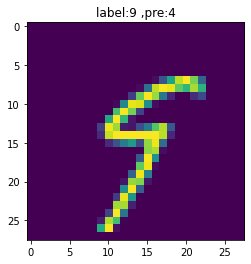

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

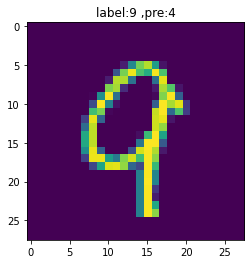

<Figure size 432x288 with 0 Axes>

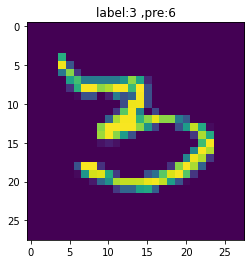

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

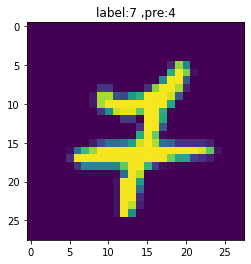

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

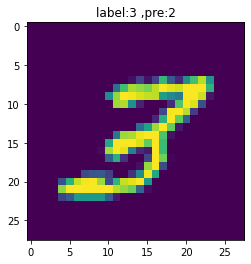

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

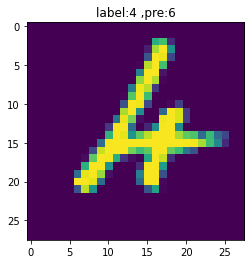

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

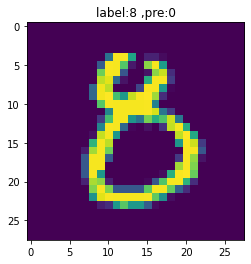

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

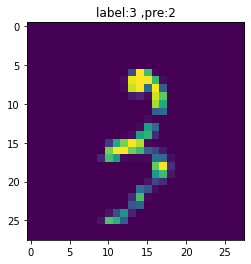

<Figure size 432x288 with 0 Axes>

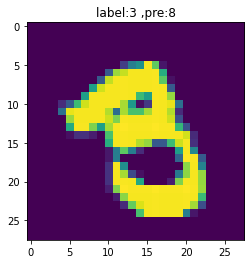

77


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
import torch
from matplotlib import pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
 
model=torch.load('mnist_DNN3')
model.eval()
 
batch_size = 64
learning_rate = 1e-2
num_epoches = 20
 
data_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])
 
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=data_transforms)
 
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
 
# for data in test_loader:
#     img,label=data
#     vimg = img.view(img.size(0), -1)
#     vimg = Variable(vimg)
#     out=model(vimg)
#     v,pre=torch.max(out,1)
#     pre=pre.numpy()
#     img=img.numpy()
#     label=label.numpy()
#     for i in range(0,10):
#         plt.figure(i)
#         curimg=img[i,0,:,:]
#         curlabel=label[i]
#         curpre=pre[i]
#         plt.imshow(curimg)
#         plt.title('label:{} ,pre:{}'.format(curlabel,curpre))
#         plt.pause(0.000001)
#     break    #annotation this line, if want to show more picture
# plt.show()
 
print('Show the wrong prediction')
cnt=0
for data in test_loader:
    img,label=data
    vimg = img.view(img.size(0), -1)
    vimg = Variable(vimg)
    out=model(vimg)
    v,pre=torch.max(out,1)
    pre=pre.numpy()
    img=img.numpy()
    label=label.numpy()
    for i in range(0,10):
        plt.figure(i)
        curimg=img[i,0,:,:]
        curlabel=label[i]
        curpre=pre[i]
        if(curpre!=curlabel):
            cnt+=1
            if(cnt<10):   # 10 is the total number of wrong prediction that you want to show. Change it as you want.
                plt.imshow(curimg)
                plt.title('label:{} ,pre:{}'.format(curlabel,curpre))
                plt.pause(0.000001)
print(cnt)
plt.show()
 